# Find the best Peacocks using average method

In [3]:
from pathlib import Path
from sisap2023.utils.mirflickr import load_encodings, set_mf_images_path

data_root = Path("/Volumes/Data")

# set the location of the mirflickr images so they can be displayed
set_mf_images_path(data_root / "mf" / "images")

# load the dino2 image embeddings and the resnet19 softmax activations
data = load_encodings(data_root / "mf_dino2")
sm_data = load_encodings(data_root / "mf_resnet19_softmax")

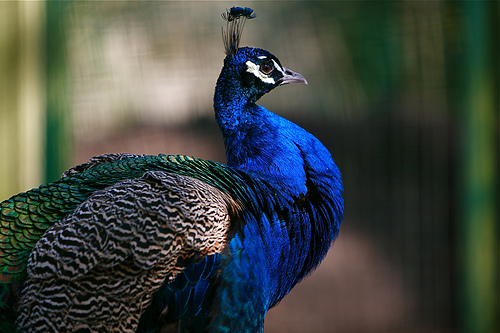

In [4]:
# get the peacock at index 
from sisap2023.utils.mirflickr import get_mf_image
q0 = 101102 # a peacock
get_mf_image(q0)

In [5]:
import numpy as np
from sisap2023.utils.distances import get_euc_dists

dists = get_euc_dists(q0, data)
closest_indices = np.argsort(dists) # the closest images to the query

best_100_for_one = closest_indices[0:100]

In [6]:
from sisap2023.utils.count_cats import get_best_cats_in_subset

peacock_category = 84

best_100_categorical = get_best_cats_in_subset(peacock_category,best_100_for_one,sm_data)

# These are the indices that might be chosen by a human ..

poly_query_indexes = best_100_categorical[0:6] # These are the indices we will use for the poly query


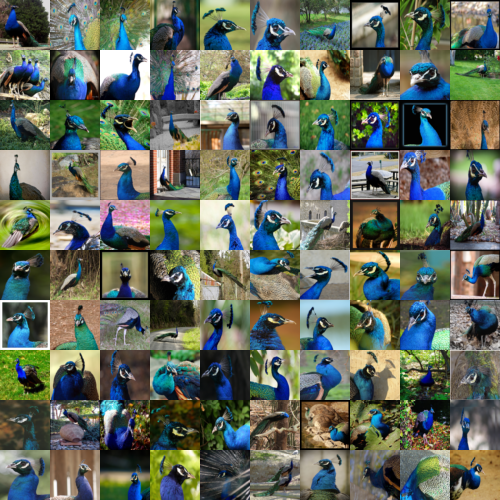

In [7]:
# These are the best images best on lowest average distance from the queries

from sisap2023.utils.mirflickr import make_mf_image_grid

make_mf_image_grid(best_100_categorical,10,10,50,50)

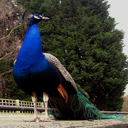

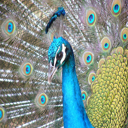

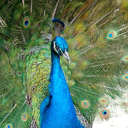

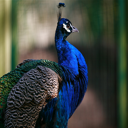

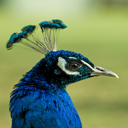

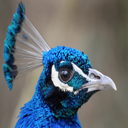

In [8]:
for i in range(0,6): # 0 is the original image
    display(get_mf_image(poly_query_indexes[i], (128, 128)))

In [9]:
# Fetch the data and whole-set distances for the extra query objects
# poly_query_distances is the distances from the queries to the all data 1000000,6

num_queries = len(poly_query_indexes)

poly_query_distances = np.zeros((num_queries,1000*1000))
for i in range(num_queries):
    poly_query_distances[i] = get_euc_dists(poly_query_indexes[i],data) 


In [10]:
row_sums = np.sum(poly_query_distances,axis=0)
lowest_sum_indices = np.argsort(row_sums)


# for i in range(10):
#     ii = lowest_sum_indices[i]
#     print( ii, row_sums[ii] )

best_100_average_indices = lowest_sum_indices[:100]


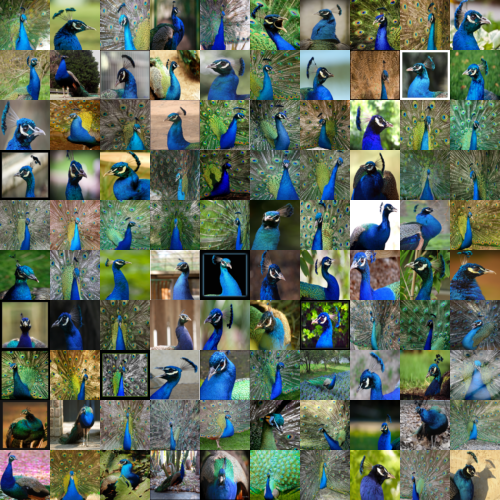

In [11]:
# These are the best images best on lowest average distance from the queries

make_mf_image_grid(best_100_average_indices,10,10,50,50)


In [12]:
# What is the catgegory for Peacock?

peacock_category = 84


In [13]:
from sisap2023.utils.count_cats import count_number_in_cat_gt_thresh 

# Quick santity check
count_number_in_cat_gt_thresh(peacock_category,0.0000000000005, sm_data)

# max_number_possible_peacocks = ??
count_number_in_cat_gt_thresh( peacock_category,0.9, sm_data)

285

In [14]:
# Now want to report results the total count in the category

from sisap2023.utils.count_cats import count_number_in_results_in_cat

encodings_for_best_100_single = sm_data[best_100_for_one] # the alexnet encodings for the best 100 average singlequery images
single_peacock_totals = encodings_for_best_100_single[:,peacock_category]
print("Total peacock sum for single query best 100: ", np.sum(single_peacock_totals))

encodings_for_best_100_average = sm_data[best_100_average_indices] # the alexnet encodings for the best 100 average polyquery images
average_peacock_totals = encodings_for_best_100_average[:,peacock_category]
print("Total peacock sum for poly query best 100: ", np.sum(average_peacock_totals))

res = count_number_in_results_in_cat(peacock_category,0.9,best_100_for_one, sm_data)
print("Total with thresh better than 0.9 single query : ", res)

res = count_number_in_results_in_cat(peacock_category,0.9,best_100_average_indices, sm_data)
print("Total with thresh better than 0.9 poly query : ", res)


Total peacock sum for single query best 100:  98.88239
Total peacock sum for poly query best 100:  99.78903
Total with thresh better than 0.9 single query :  98
Total with thresh better than 0.9 poly query :  100
